# Regressão linear simples: ajuste por mínimos quadrados

## O que vamos fazer?
- Importar datasets no ambiente de trabalho
- Ajustar uma regressão linear simples por mínimos quadrados manualmente
- Resolver essa regressão usando funções matemáticas de Numpy 
- Visualizar a regressão com o Matplotlib

## Tarefa 1: Importar datasets

Para este exercício deve importar os seguintes datasets para o ambiente local, usados num exercício anterior e disponíveis nessa unidade:
- módulo1-unidade1-exercício1-dataset-tarefa2.csv
-  módulo1-unidade1-exercício1-dataset-tarefa3.csv

Em função do seu ambiente, terá de seguir passos diferentes para os importar. Pode importá-los tanto no Google Colab como no VM, usando a interface de JupyterLab ou as funcionalidades do seu VM. Como os ambientes são tão diferentes, não incluímos instruções passo a passo para isso, mas não deve ter dificuldade nenhuma para o fazer :).

Deve aproveitar este tempo para se familiarizar com o seu ambiente de trabalho e descobrir as opções para importar datasets locais.

**Nota:** Assegurar-se de que os importa ou que os move posteriormente para o diretório de soluções, na pasta para esta unidade/sessão

## Tarefa 2: Ajustar a regressão linear simples por mínimos quadrados

Para esta tarefa, vamos ajustar a regressão passo a passo, calculando cada valor com o Numpy para nos familiarizarmos com as suas funções

**Nota:** Vamos utilizar unicamente a função de soma de Numpy. Na seguinte tarefa iremos usar as funções para calcular diretamente a média de um array, desvios típicos ou covariância

In [3]:
import numpy as np

### Importar o dataset no Numpy

Executar a seguinte célula para importar o dataset com um array de Numpy, assegurando-se que o nome do dataset é correto e que o arquivo se encontra no mesmo diretório que o notebook

In [7]:
import csv

with open('M1_U1_Ej1_dataset-tarea2.csv') as csvfile:
    
    #dataset_np = np.asarray(list(csv.reader(csvfile))[1:])
    read_csv = list(csv.reader(csvfile))

# Eliminar cabeçalho
read_csv = read_csv[1:]

# Mudar de caracter decimal de vírgula para ponto
for line in read_csv:
    for i in [0, 1]:
        line[i] = line[i].replace(',', '.')

# Carregar como array de Numpy
dataset1 = np.asarray(read_csv).astype(float)
print(dataset1)

[[  0.    34.64]
 [  2.    25.59]
 [  4.    28.52]
 [  6.    40.42]
 [  8.    11.12]
 [ 10.    61.2 ]
 [ 12.    44.1 ]
 [ 14.    73.33]
 [ 16.    56.14]
 [ 18.    57.83]
 [ 20.    50.74]
 [ 22.    90.15]
 [ 24.   100.63]
 [ 26.    83.65]
 [ 28.   103.47]
 [ 30.    89.48]
 [ 32.   128.12]
 [ 34.   140.35]
 [ 36.   137.97]
 [ 38.   122.06]
 [ 40.   118.24]
 [ 42.   146.39]
 [ 44.   138.15]
 [ 46.   158.85]
 [ 48.   135.65]
 [ 50.   187.84]]


Já dispomos dos dados num array 2D de Numpy.


Agora, deve completar o código das seguintes células para ajustar a regressão linear:

In [8]:
## TODO: Criar 2 arrays 1D a partir do dataset importado que correspondam às colunas X e Y do CSV

X = dataset1[:, 0]
Y = dataset1[:, 1]
print(type(X))
print("X")
print(X)
print("Y")
print(Y)
print(len(X))
print(len(Y))

<class 'numpy.ndarray'>
X
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50.]
Y
[ 34.64  25.59  28.52  40.42  11.12  61.2   44.1   73.33  56.14  57.83
  50.74  90.15 100.63  83.65 103.47  89.48 128.12 140.35 137.97 122.06
 118.24 146.39 138.15 158.85 135.65 187.84]
26
26


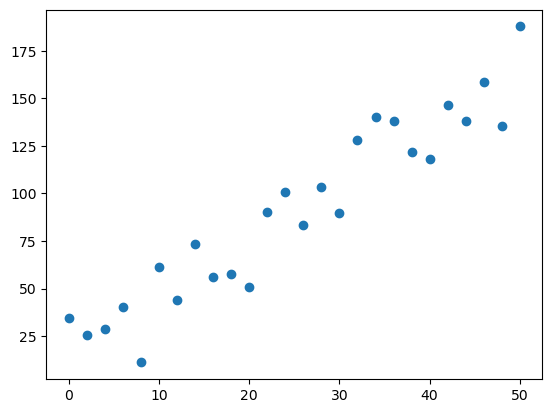

In [9]:
## TODO: Antes de formar o modelo, representar os dados numa gráfica de pontos de Matplotlib

import matplotlib.pyplot as plt

# Pode usar a função scatter()
plt.scatter(X, Y)

plt.show()

In [10]:
a = X*Y
print(a)

[   0.     51.18  114.08  242.52   88.96  612.    529.2  1026.62  898.24
 1040.94 1014.8  1983.3  2415.12 2174.9  2897.16 2684.4  4099.84 4771.9
 4966.92 4638.28 4729.6  6148.38 6078.6  7307.1  6511.2  9392.  ]


Recordar as equações da regressão linear:
$Y = m \times X + b$

$m=\frac{\sum xy-\frac{(\sum x)(\sum y)}{n}}{\sum x^2-\frac{(\sum x)^2}{n}}$

$b=\overline{y}-m\times\overline{x}$

In [11]:
## TODO: Calcular m usando a função np.sum(ndarray) ou ndarray.sum(), onde ndarray é o array a somar
n = len(X)
print("n = ", n)

XY = np.multiply(X, Y)    # Recordar, é uma multiplicação de vetores elemento-a-elemento. Usar a função np.multiply()
print("XY = ", XY)

X2 = X ** 2
print("X2 = ", X2)

Y2 = Y ** 2
print("Y2 = ", Y2)

m = (XY.sum() - ((X.sum() * Y.sum()) / n)) / (X2.sum() - ((X.sum()**2) / n))
print("m = ", m)

n =  26
XY =  [   0.     51.18  114.08  242.52   88.96  612.    529.2  1026.62  898.24
 1040.94 1014.8  1983.3  2415.12 2174.9  2897.16 2684.4  4099.84 4771.9
 4966.92 4638.28 4729.6  6148.38 6078.6  7307.1  6511.2  9392.  ]
X2 =  [   0.    4.   16.   36.   64.  100.  144.  196.  256.  324.  400.  484.
  576.  676.  784.  900. 1024. 1156. 1296. 1444. 1600. 1764. 1936. 2116.
 2304. 2500.]
Y2 =  [ 1199.9296   654.8481   813.3904  1633.7764   123.6544  3745.44
  1944.81    5377.2889  3151.6996  3344.3089  2574.5476  8127.0225
 10126.3969  6997.3225 10706.0409  8006.6704 16414.7344 19698.1225
 19035.7209 14898.6436 13980.6976 21430.0321 19085.4225 25233.3225
 18400.9225 35283.8656]
m =  2.9575196581196566


In [12]:
## TODO: Calcula b

# TODO: Substituir "sum_y" e "sum_x" pelo código ou variáveis correspondentes
y_avg = Y.sum() / n
print("y_avg = ", y_avg) 

x_avg = X.sum() / n
print("x_avg = ", x_avg) 

b = y_avg - m * x_avg
print("b = ", b)

print("Equação da reta: y = ", round(m, 2), "x + ", round(b, 2))

y_avg =  90.9473076923077
x_avg =  25.0
b =  17.00931623931629
Equação da reta: y =  2.96 x +  17.01


Avaliar o modelo calculando o seu R2.

Recordar as equações para calcular o coeficiente de correlação:

$R^2 = \frac{\sigma_{xy}}{\sigma_x \cdot \sigma_y}$

$\sigma_{xy} = \frac{\overline{x \cdot y}}{n}$

$\sigma_x = \sqrt{\frac{\sum x^2}{n} - \bar{x}^2}$

$\sigma_y = \sqrt{\frac{\sum y^2}{n} - \bar{y}^2}$

In [13]:
## TODO: Calcula r2

xy_avg = XY.sum() / n   # media(x.y)
print("xy_avg = ", xy_avg)

x_std = np.sqrt((X2.sum() / n) - x_avg ** 2)
print("x_std = ", x_std)

y_std = np.sqrt((Y2.sum() / n) - y_avg ** 2)
print("y_std = ", y_std)

xy_cv = xy_avg / n    #covariança de xy
print("xy_cv = ", xy_cv)

r2 = xy_cv / (x_std * y_std)
print("r2 = ", r2)

xy_avg =  2939.124615384615
x_std =  15.0
y_std =  46.79410675893773
xy_cv =  113.0432544378698
r2 =  0.1610505571000183


Calcular as previsões de Y como y_pred para os valores de X originais, com os coeficientes do modelo ajustado:

$y\_pred = m \times X + b$

In [14]:
## TODO: Calcular y_pred
y_pred = X * m + b
y_pred = np.round(y_pred, 2)
print("y_pred = ", y_pred)

y_pred =  [ 17.01  22.92  28.84  34.75  40.67  46.58  52.5   58.41  64.33  70.24
  76.16  82.07  87.99  93.9   99.82 105.73 111.65 117.56 123.48 129.4
 135.31 141.23 147.14 153.06 158.97 164.89]


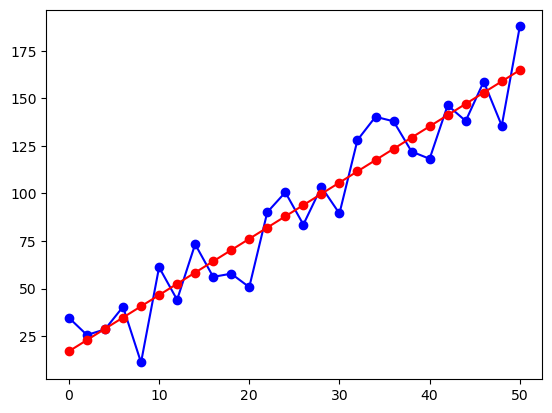

In [15]:
# TODO: Representar com Matplotlib um gráfico com 2 séries em cores diferentes: Y vs X, y_pred vs X

# Criar o gráfico

# Plotar a primeira série
plt.plot(X, Y, label="Y vs X", color="blue", marker="o")

# Plotar a segunda série
plt.plot(X, y_pred, label="y_pred vs X", color="red", marker="o")

## Tarefa 3:  Ajustar a regressão linear com as funções matemáticas de Numpy

Agora, repetir os passos anteriores para ajustar a regressão linear aproveitando todas as capacidades de Numpy: as suas funções para calcular as somas, média, desvio típico e covariância de arrays

In [16]:
## TODO: Resolver a regressão linear com as funções avançadas de Numpy
## Usar novos nomes de variáveis como np_x_avg, np_x_std, np_r2, etc.

np_m = (np.sum(X*Y) - (X.sum() * Y.sum() / n)) / (X2.sum() - (X.sum()**2) / n)
print("np_m = ", np_m)

np_b = np.average(Y) - m * np.average(X)
print("np_b = ", np_b)

np_x_std = np.sqrt((X2.sum() / n) - np.average(X)**2) 
print("np_x_std = ", np_x_std)

np_y_std = np.sqrt((Y2.sum() / n) - np.average(Y)**2) 
print("np_y_std = ", np_y_std)

np_xy_cv = np.average(XY) / n 
print("np_xy_cv = ", np_xy_cv)

np_r2 = np_xy_cv / (np_x_std * np_y_std)
print("np_r2 = ", np_r2)

np_m =  2.9575196581196566
np_b =  17.00931623931629
np_x_std =  15.0
np_y_std =  46.79410675893773
np_xy_cv =  113.0432544378698
np_r2 =  0.1610505571000183


## Tarefa 4: calcular os resíduos e fazer previsões

Calcular os resíduos do seu modelo:

$residuos = Y - Y\_pred$

[ 17.63   2.67  -0.32   5.67 -29.55  14.62  -8.4   14.92  -8.19 -12.41
 -25.42   8.08  12.64 -10.25   3.65 -16.25  16.47  22.79  14.49  -7.34
 -17.07   5.16  -8.99   5.79 -23.32  22.95]


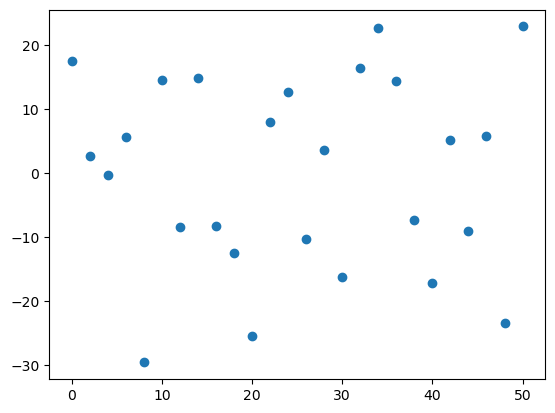

In [23]:
## TODO: Calcular os resíduos e represente-os com Matplotlib num gráfico de pontos vs X
res = Y - y_pred
print(res)

# Gráfico de Matplotlib
# Pode usar a função scatter()
plt.scatter(X, res)

plt.show()

Realizar previsões para 2 (ou mais) valores novos de X, 1 valor para interpolação e 1 valor para extrapolação

In [18]:
# TODO: Fazer previsões com o modelo ajustado

x_interpol = np.array([15.5, 28.4])
print("x_interpol = ", x_interpol)
y_interpol = x_interpol * np_m + np_b
print("y_interpol = ", y_interpol)
print()
x_extrapol = np.array([40, 52])
print("x_extrapol = ", x_extrapol)
y_extrapol = x_extrapol * np_m + np_b
print("y_extrapol = ", y_extrapol)


x_interpol =  [15.5 28.4]
y_interpol =  [ 62.85087094 101.00287453]

x_extrapol =  [40 52]
y_extrapol =  [135.31010256 170.80033846]


## Tarefa 5: resolução com Scikit-learn

*Atreve-se a resolver uma regressão linear simples usando Scikit-learn? E a avaliar e fazer previsões?*

Rever o código deste notebook e adapte-o para usar os nossos dados: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

In [21]:
# TODO: Resolver a regressão linear simples usando Scikit-learn a partir desse exemplo
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=5, shuffle=False)
print("X_train ", X_train)
print("X_test ", X_test)
print("Y_train ", Y_train)
print("Y_test ", Y_test)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
print("X_train ", X_train)
print("X_test ", X_test)
    

X_train  [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40.]
X_test  [42. 44. 46. 48. 50.]
Y_train  [ 34.64  25.59  28.52  40.42  11.12  61.2   44.1   73.33  56.14  57.83
  50.74  90.15 100.63  83.65 103.47  89.48 128.12 140.35 137.97 122.06
 118.24]
Y_test  [146.39 138.15 158.85 135.65 187.84]
X_train  [[ 0.]
 [ 2.]
 [ 4.]
 [ 6.]
 [ 8.]
 [10.]
 [12.]
 [14.]
 [16.]
 [18.]
 [20.]
 [22.]
 [24.]
 [26.]
 [28.]
 [30.]
 [32.]
 [34.]
 [36.]
 [38.]
 [40.]]
X_test  [[42.]
 [44.]
 [46.]
 [48.]
 [50.]]


In [135]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(X_train, Y_train)

print("Coeficiente (slope):", regressor.coef_)
print("Intercepto:", regressor.intercept_)
print("Score (R^2):", regressor.score(X_test, Y_test))

Coeficiente (slope): [2.93018182]
Intercepto: 17.479696969696974
Score (R^2): 0.32703149882093174


In [136]:
from sklearn.metrics import mean_squared_error, r2_score

skl_y_pred = regressor.predict(X_test)

print(f"Mean squared error: {mean_squared_error(Y_test, skl_y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(Y_test, skl_y_pred):.2f}")

Mean squared error: 243.96
Coefficient of determination: 0.33
